In [4]:
import numpy as np
import IPython
import matplotlib.pyplot as plt

import scipy.signal
from scipy.io.wavfile import write

In [5]:
def get_sampled_signal(func, fs, ti, tf):
        
    dt = tf - ti # time interval
    N = int(dt*fs) # number of samples
    
    sampled_signal = [] 
    for i in range(N):
        cur_val = func(ti + i/fs) # signal at time 'ti + i/fs'
        sampled_signal.append(cur_val)
        
    return np.asarray(sampled_signal)

In [6]:
def downsample2(x0):
    return x0[1::2]

In [7]:
def lowpass(cutoff, fs, order=50):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = scipy.signal.iirfilter(order, normal_cutoff, btype='low', ftype='butter')
    return b, a

In [8]:
def highpass(cutoff, fs, order=50):
    nyq = 0.5*fs
    normal_cutoff = cutoff/nyq
    b, a = scipy.signal.iirfilter(order, normal_cutoff, btype='high', ftype='butter')
    return b, a

In [9]:
fs=8e3
cutoff=2e3
n=2**12

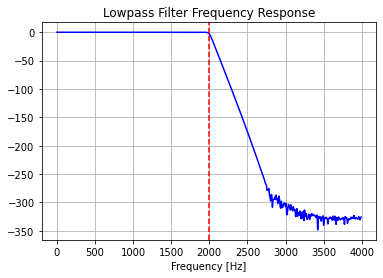

In [10]:
b, a = lowpass(cutoff, fs)
w, h = scipy.signal.freqz(b, a, fs=fs)
plt.plot(w, 20*np.log10(np.abs(h)), 'b')
plt.axvline(cutoff, color='r', linestyle='--')
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

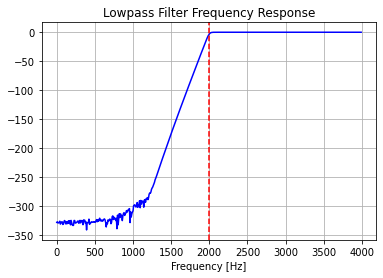

In [11]:
b, a = highpass(cutoff, fs)
w, h = scipy.signal.freqz(b, a, fs=fs)
plt.plot(w, 20*np.log10(np.abs(h)), 'b')
plt.axvline(cutoff, color='r', linestyle='--')
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

In [12]:
omega1 = 2*np.pi*880
omega2 = 2*np.pi*880*2
omega3 = 2*np.pi*880*3
omega4 = 2*np.pi*880*4
func = lambda t: np.sum([np.sin(omega1*t), np.sin(omega2*t), np.sin(omega3*t), np.sin(omega4*t)])

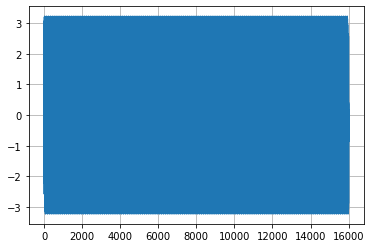

In [15]:
x0 = get_sampled_signal(func, fs, 0, 2)
plt.plot(x0)
plt.grid()
plt.show()

In [16]:
len(x0)

16000

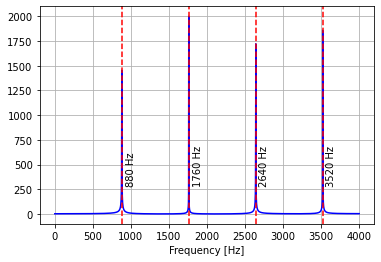

In [17]:
s = scipy.fft.fft(x0, n=n)
s = s[:n//2]
w = np.linspace(0, fs/2, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(880, color='r', linestyle='--')
plt.text(880+50, 300, '880 Hz', rotation=90)
plt.axvline(880*2, color='r', linestyle='--')
plt.text(1760+50, 300, '1760 Hz', rotation=90)
plt.axvline(880*3, color='r', linestyle='--')
plt.text(2640+50, 300, '2640 Hz', rotation=90)
plt.axvline(880*4, color='r', linestyle='--')
plt.text(3520+50, 300, '3520 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## First decomposition (Low frequencies)

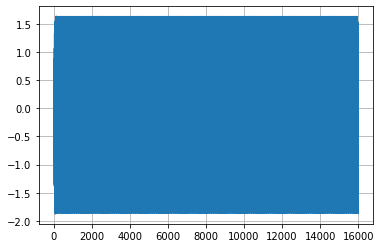

In [18]:
b, a = lowpass(fs/4, fs)
f1 = scipy.signal.lfilter(b, a, x0)
plt.plot(f1)
plt.grid()
plt.show()

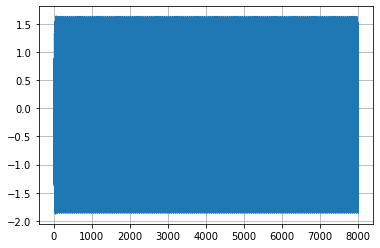

In [19]:
x1_l = downsample2(f1)
plt.plot(x1_l)
plt.grid()
plt.show()

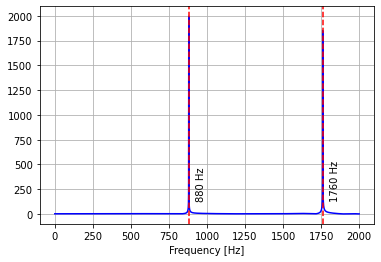

In [20]:
s = scipy.fft.fft(x1_l, n=n)
s = s[:n//2]
w = np.linspace(0, fs/4, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(880, color='r', linestyle='--')
plt.text(880+50, 150, '880 Hz', rotation=90)
plt.axvline(880*2, color='r', linestyle='--')
plt.text(1760+50, 150, '1760 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## First decomposition (High frequencies)

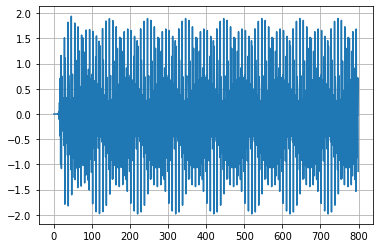

In [15]:
b, a = highpass(fs/4, fs)
g1 = scipy.signal.lfilter(b, a, x0)
plt.plot(g1)
plt.grid()
plt.show()

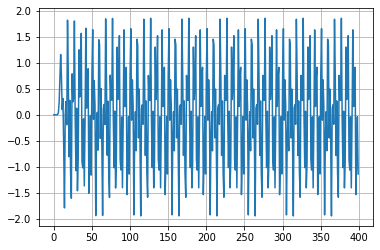

In [16]:
x1_h = downsample2(g1)
plt.plot(x1_h)
plt.grid()
plt.show()

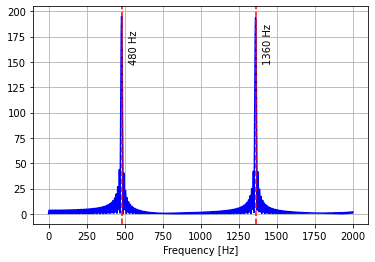

In [17]:
s = scipy.fft.fft(x1_h, n=n)
s = s[:n//2]
w = np.linspace(0, fs/4, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(1360, color='r', linestyle='--')
plt.text(1360+50, 150, '1360 Hz', rotation=90)
plt.axvline(480, color='r', linestyle='--')
plt.text(480+50, 150, '480 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## Second decomposition (Low frequencies of low frequencies)

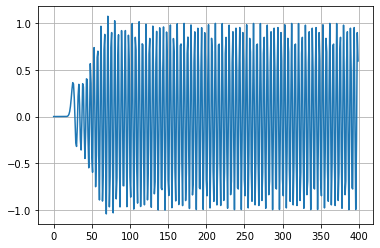

In [18]:
b, a = lowpass(fs/8, fs/2)
f2_l = scipy.signal.lfilter(b, a, x1_l)
plt.plot(f2_l)
plt.grid()
plt.show()

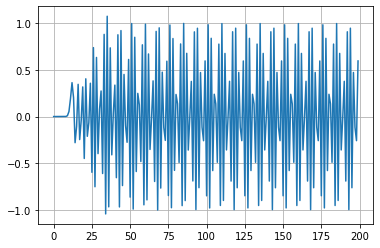

In [19]:
x2_ll = downsample2(f2_l)
plt.plot(x2_ll)
plt.grid()
plt.show()

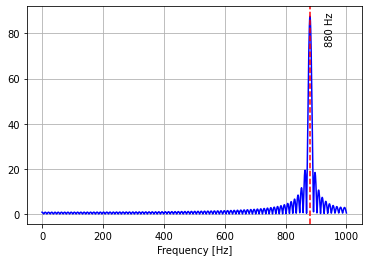

In [20]:
s = scipy.fft.fft(x2_ll, n=n)
s = s[:n//2]
w = np.linspace(0, fs/8, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(880, color='r', linestyle='--')
plt.text(880+50, 75, '880 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## Second decomposition (High frequencies of low frequencies)

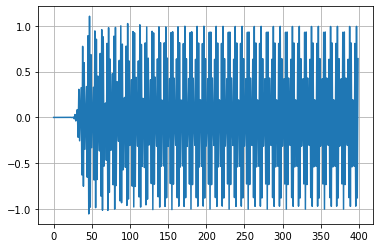

In [21]:
b, a = highpass(fs/8, fs/2)
f2_h = scipy.signal.lfilter(b, a, x1_l)
plt.plot(f2_h)
plt.grid()
plt.show()

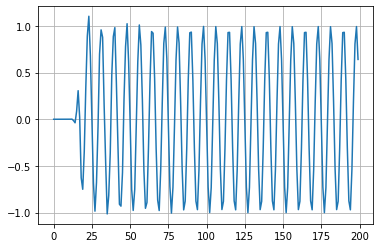

In [22]:
x2_hl = downsample2(f2_h)
plt.plot(x2_hl)
plt.grid()
plt.show()

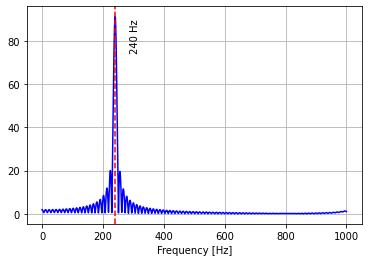

In [23]:
s = scipy.fft.fft(x2_hl, n=n)
s = s[:n//2]
w = np.linspace(0, fs/8, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(240, color='r', linestyle='--')
plt.text(240+50, 75, '240 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## Second decomposition (Low frequencies of high frequencies)

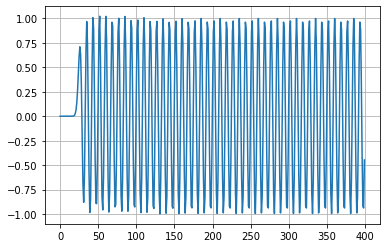

In [24]:
b, a = lowpass(fs/8, fs/2)
g2_l = scipy.signal.lfilter(b, a, x1_h)
plt.plot(g2_l)
plt.grid()
plt.show()

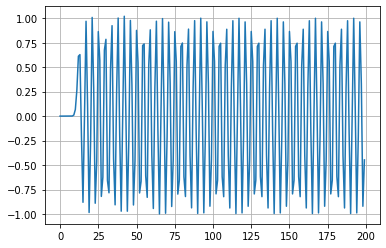

In [25]:
x2_lh = downsample2(g2_l)
plt.plot(x2_lh)
plt.grid()
plt.show()

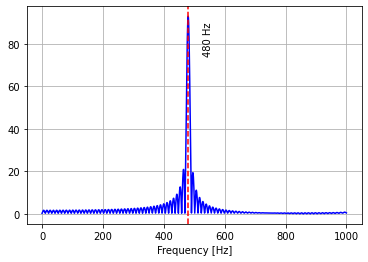

In [26]:
s = scipy.fft.fft(x2_lh, n=n)
s = s[:n//2]
w = np.linspace(0, fs/8, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(480, color='r', linestyle='--')
plt.text(480+50, 75, '480 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()

## Second decomposition (High frequencies of high frequencies)

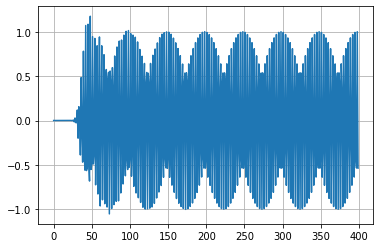

In [27]:
b, a = highpass(fs/8, fs/2)
g2_h = scipy.signal.lfilter(b, a, x1_h)
plt.plot(g2_h)
plt.grid()
plt.show()

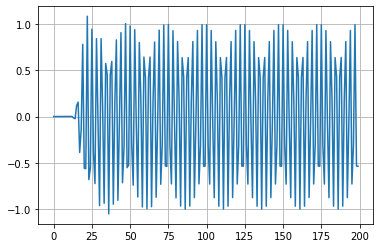

In [28]:
x2_hh = downsample2(g2_h)
plt.plot(x2_hh)
plt.grid()
plt.show()

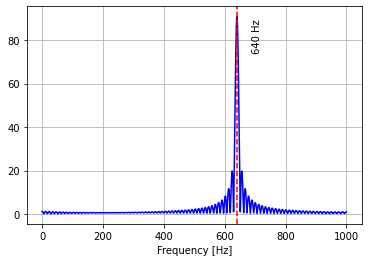

In [29]:
s = scipy.fft.fft(x2_hh, n=n)
s = s[:n//2]
w = np.linspace(0, fs/8, num=n//2)
plt.plot(w, np.abs(s), 'b')
plt.axvline(640, color='r', linestyle='--')
plt.text(640+50, 75, '640 Hz', rotation=90)
plt.xlabel('Frequency [Hz]')
plt.grid()
plt.show()